<a href="https://colab.research.google.com/github/Prethumnan/KMeans-clustering/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
df=data[["ApplicantIncome","LoanAmount"]]

In [11]:
#Convert to numpy array
X=df.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


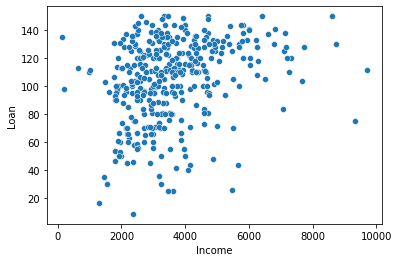

In [12]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [18]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


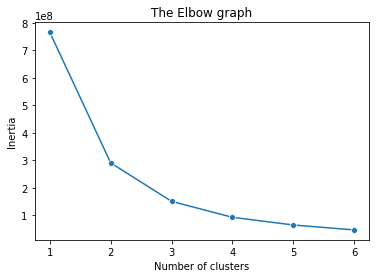

In [41]:
l=[]
for i in range(1,7):
  kmeans= KMeans(i)
  kmeans.fit(X)
  inertia = kmeans.inertia_
  l.append(inertia)

number_clusters = [1,2,3,4,5,6]
sns.lineplot(number_clusters,l,marker="o")
plt.title('The Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From the above Elbow graph,the best k values are 3 and 4

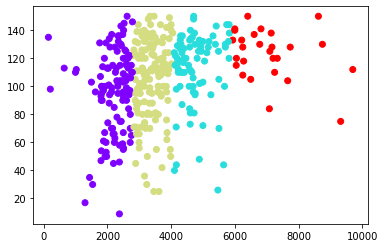

In [36]:
model=KMeans(4)
model.fit(X)
cluster=model.fit_predict(X)
new=df.copy()
new["cluster"]=cluster
plt.scatter(new["ApplicantIncome"],new["LoanAmount"],c=cluster,cmap="rainbow")